#  Step 1: Import Libraries

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset

In [44]:
df=pd.read_csv('customer_shopping_data.csv')

In [45]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [46]:
df.shape

(99457, 10)

# Step 3: Data Cleaning

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# Check missing values

In [48]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    print(f'{i} has: {df[i].isnull().sum()/df.shape[0]}')
  else:
    print(f'{i} is not null')

invoice_no is not null
customer_id is not null
gender is not null
age is not null
category is not null
quantity is not null
price is not null
payment_method is not null
invoice_date is not null
shopping_mall is not null


# Check duplicates

In [49]:
df.duplicated().sum()

np.int64(0)

# Drop irrelevant columns

In [50]:
df = df.drop(columns=["invoice_no", "customer_id"])

# Extract datetime features

In [51]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"], dayfirst=True)
df["month"] = df["invoice_date"].dt.month
df["weekday"] = df["invoice_date"].dt.weekday
df = df.drop(columns=["invoice_date"])

# Encode categorical columns

In [52]:
le = LabelEncoder()
for col in ["gender", "category", "payment_method", "shopping_mall"]:
    df[col] = le.fit_transform(df[col])

#  Step 4: Exploratory Data Analysis

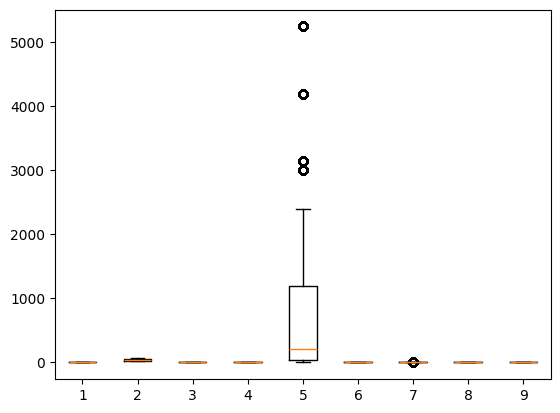

In [53]:
plt.boxplot(df)
plt.show()

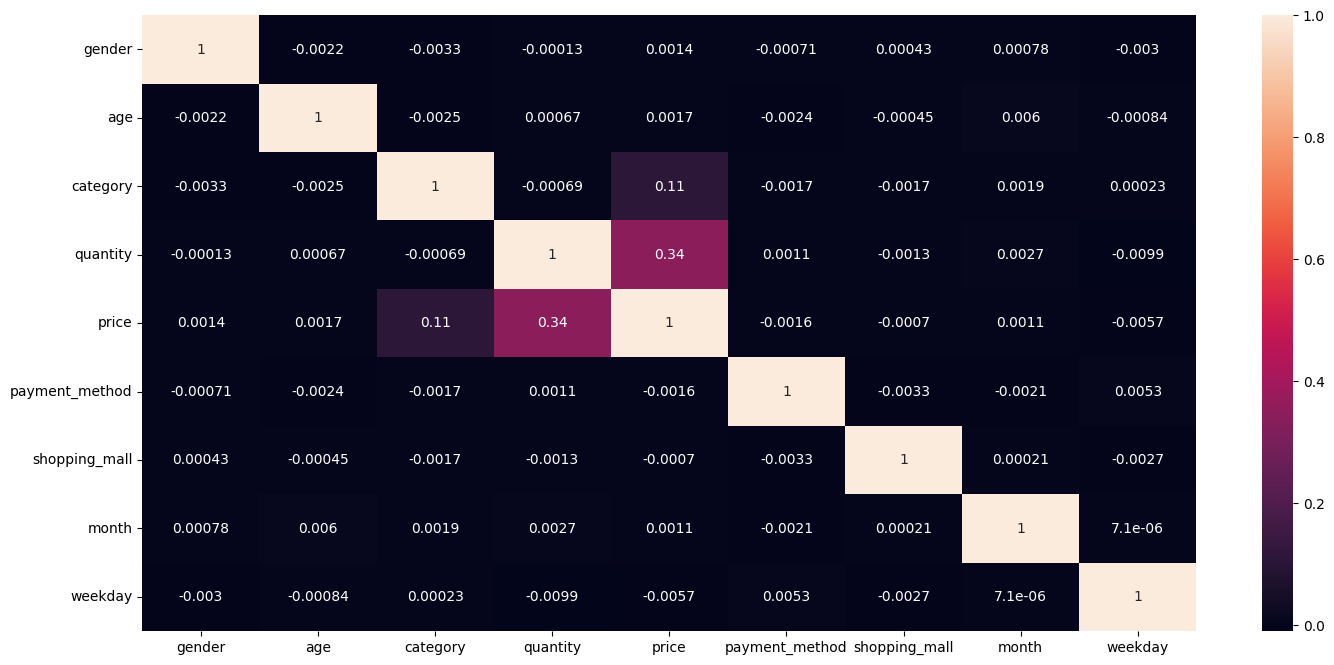

In [54]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

#Step 5: Feature Scaling

In [55]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#  Step 6: K-Means Clustering (Elbow Method)

In [56]:
from sklearn.cluster import KMeans

inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

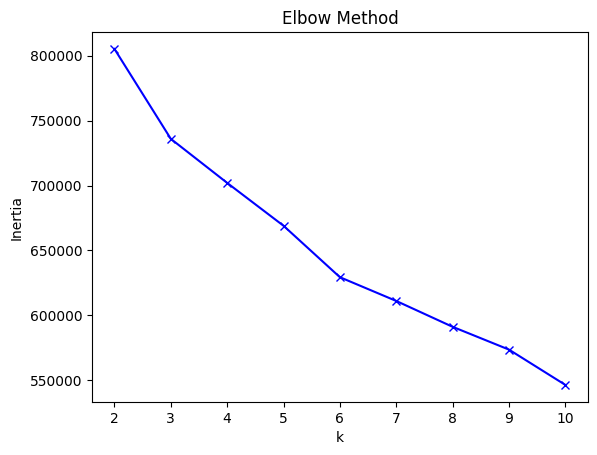

In [57]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


#  Step 7: K-Means Clustering (Silhouette Score)

In [18]:
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f'For k={k}, Silhouette Score={score}')

For k=2, Silhouette Score=0.09817217355523625
For k=3, Silhouette Score=0.1077557668209889
For k=4, Silhouette Score=0.09794901102721794
For k=5, Silhouette Score=0.08834569762971298
For k=6, Silhouette Score=0.10007801929214302
For k=7, Silhouette Score=0.09589118659747317
For k=8, Silhouette Score=0.09079465475874837
For k=9, Silhouette Score=0.09669983695907608
For k=10, Silhouette Score=0.09737848758452095


#  Step 8: PCA Visualization of Clusters

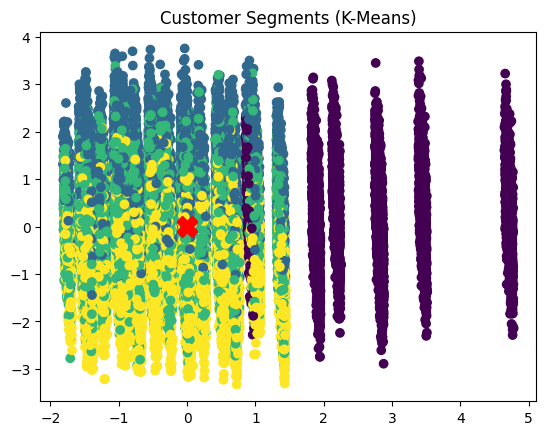

In [58]:
from sklearn.decomposition import PCA

pca = PCA(2)
reduced_data = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

plt.scatter(reduced_data[:,0], reduced_data[:,1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X')
plt.title("Customer Segments (K-Means)")
plt.show()


#  Step 9: Optimal K & Cluster Profiling

In [59]:
optimal_k = 4
print(f"Based on Elbow & Silhouette Method, the optimal number of clusters is {optimal_k}")

Based on Elbow & Silhouette Method, the optimal number of clusters is 4


In [60]:
df['Cluster'] = clusters
cluster_profile = df.groupby('Cluster').mean()
print("Cluster Profiling (Mean Values):\n")
print(cluster_profile)
print("\nNumber of customers in each cluster:")
print(df['Cluster'].value_counts())

Cluster Profiling (Mean Values):

           gender        age  category  quantity        price  payment_method  \
Cluster                                                                         
0        0.404090  43.472714  4.945929  4.040271  3189.746665        0.723372   
1        0.402427  43.316563  2.592173  2.906758   491.081980        2.000000   
2        0.400321  43.427792  2.559899  2.914732   465.067440        0.441069   
3        0.403029  43.477058  2.574879  2.914701   467.815106        0.435497   

         shopping_mall     month   weekday  
Cluster                                     
0             4.725630  6.093589  2.989085  
1             4.716317  6.116071  3.018124  
2             4.710634  3.220407  2.971917  
3             4.725649  9.502728  3.004651  

Number of customers in each cluster:
Cluster
2    39241
3    33541
1    18704
0     7971
Name: count, dtype: int64


#  Step 10: DBSCAN Clustering

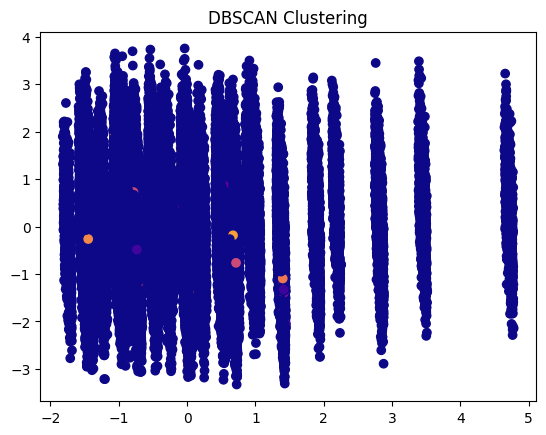

In [61]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(scaled_data)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=db.labels_, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

In [62]:
import gc
del reduced_data, clusters, kmeans
gc.collect()

23888

# Step 11: Hierarchical Clustering

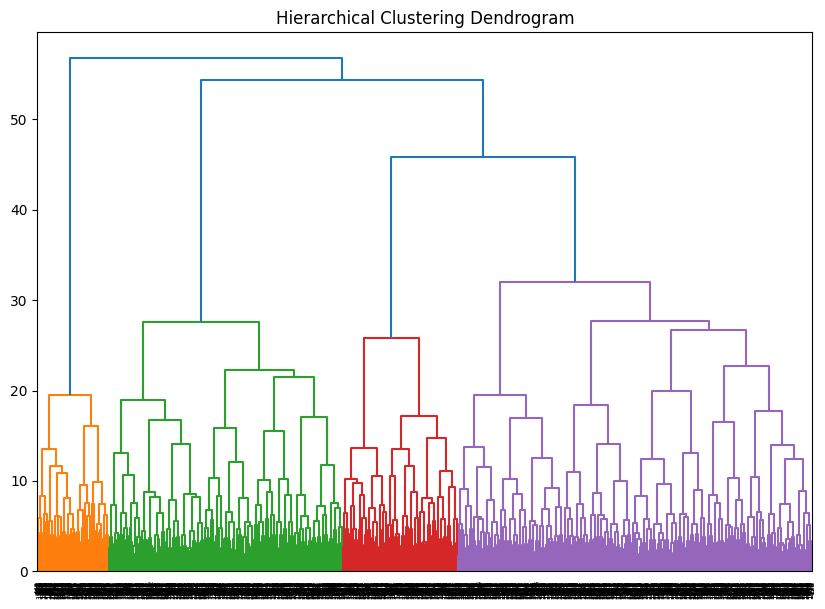

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage
sample_data = scaled_data[:2000]
Z = linkage(sample_data, method='ward')
plt.figure(figsize=(10,7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()